In [76]:
from riskquant import pertloss

# pert = pertloss.PERTLoss(50, 1000, 0, 0.3, 0.1, 4)
pert = pertloss.PERTLoss(50, 1_000_000, 0, 0.3, 0.1, 4)


# n = 100
# lst = []
# for i in range(100):
#     losses = pert.simulate_losses_one_year()
#     print ("Year ", i, " - ", losses)

losses = pert.simulate_years(100)

summary = pert.summarize_loss(losses)

# print(summary)


print(
    "minimum = ", f'{summary["minimum"]:,}', "\n", 
    "tenth_percentile = ", f'{summary["tenth_percentile"]:,}', "\n", 
    "mode = ", f'{summary["mode"]:,}', "\n", 
    "median = ", f'{summary["median"]:,}', "\n", 
    "ninetieth_percentile = ", f'{summary["ninetieth_percentile"]:,}' , "\n", 
    "maximum = ", f'{summary["maximum"]:,}'
)


minimum =  0 
 tenth_percentile =  0 
 mode =  0 
 median =  0 
 ninetieth_percentile =  1,262 
 maximum =  1,670,454


Maximum:  18,218,446,848
Mean expected:  7,071
Mean obtained:  741,789
Median obtained:  6,977


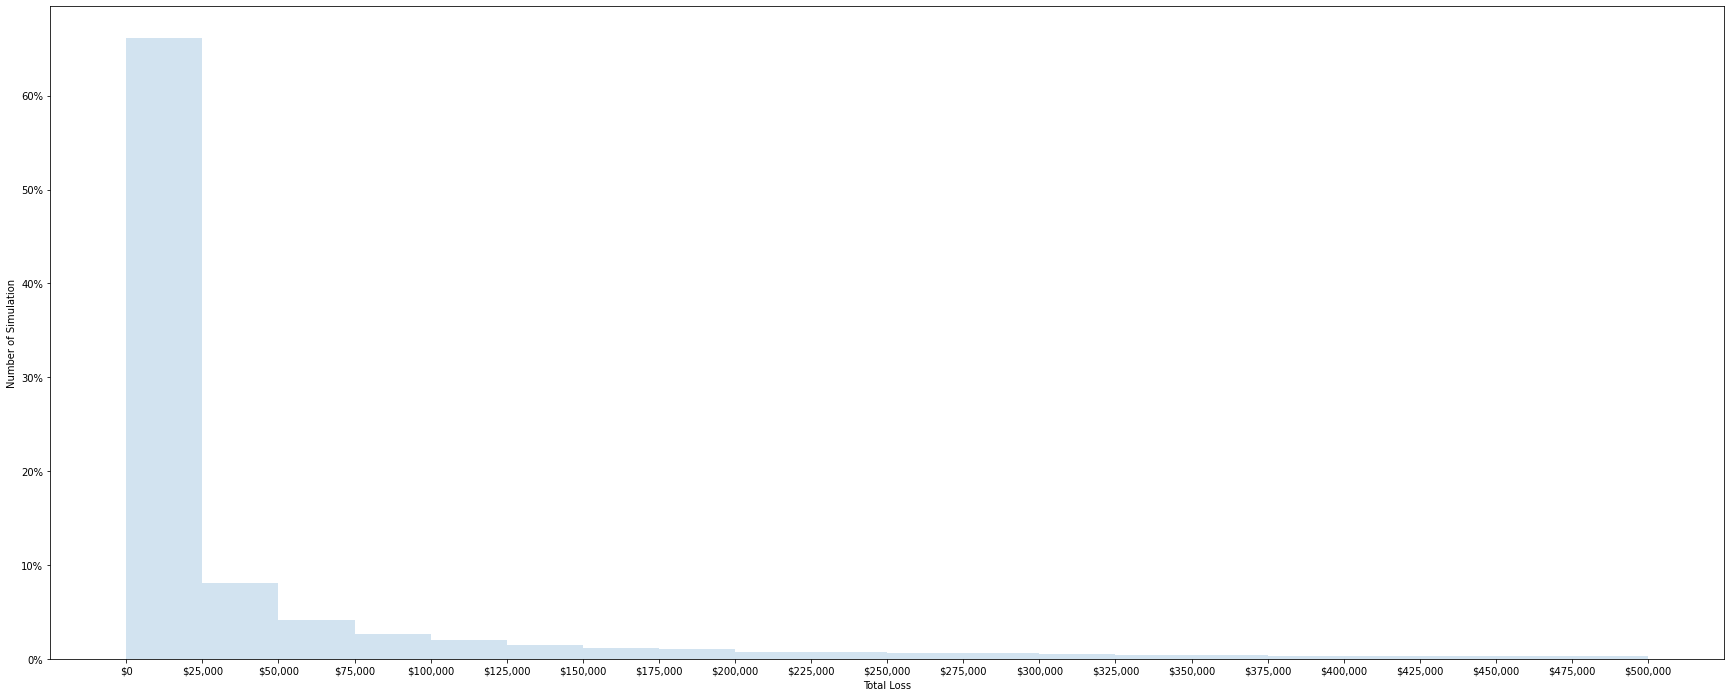

In [17]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import math
from scipy.stats import norm
from scipy.stats import lognorm
from statistics import mean, median

low_loss = 50
high_loss = 1_000_000
#figure(figsize=(16, 12), dpi=80)

# Sets the default used for Jupyter output.
plt.rcParams["figure.figsize"] = (30,12)
# plt.xkcd(scale=1, length=100, randomness=2)

# Set up the lognormal distribution
# factor = -0.5 / norm.ppf(0.05)
# mu = (math.log(low_loss) + math.log(high_loss)) / 2.  # Average of the logn of low/high
# shape = factor * (math.log(high_loss) - math.log(low_loss))  # Standard deviation
# distribution = lognorm(shape, scale=math.exp(mu))
# r = distribution.rvs(100000)

lnminValue = math.log(low_loss)
lnmaxValue = math.log(high_loss)

# If a 95% confidence interval is available for an absolute measure of intervention effect 
# (e.g. SMD, risk difference, rate difference), then the standard error can be calculated as
#   SE = (upper limit – lower limit) / 3.92.
# For 90% confidence intervals divide by 3.29 rather than 3.92; for 99% confidence intervals divide by 5.15.
sigma = (lnmaxValue - lnminValue) / 3.29
#sigma = (lnmaxValue - lnminValue) / 5.15
mu = (lnmaxValue + lnminValue) / 2
r = lognorm.rvs(sigma, scale=math.exp(mu), size=100_000)

maxr = max(r)
print("Maximum: ", f'{int(maxr):,}')

print("Mean expected: ", f'{int(math.exp(mu)):,}')

avgr = mean(r)
print("Mean obtained: ", f'{int(avgr):,}')
print("Median obtained: ", f'{int(median(r)):,}')


fig, ax = plt.subplots(1, 1)
counts, bins, patches = ax.hist(r, bins=20, range = (0, 500_000), density=False, histtype='stepfilled', alpha=0.2)
ax.set_xticks(bins)
plt.xlabel("Total Loss")
plt.ylabel("Number of Simulation")
plt.ticklabel_format(axis="x", style="plain")
# plt.yscale("log")
xtick = mtick.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(xtick)
ytick = mtick.PercentFormatter(xmax=100_000)
ax.yaxis.set_major_formatter(ytick)



plt.show()

